In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# DATA UNDERSTANDING

In [3]:
discrete = ['University Rating','Research','SOP','LOR']
continous = ['Serial No.','GRE Score','TOEFL Score','CGPA','Chance of Admit']

In [4]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [5]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [6]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'},inplace=True)

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
df.SOP.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [11]:
df.LOR.value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [12]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
discrete = ['University Rating','Research','SOP','LOR']
continous = ['Serial No.','GRE Score','TOEFL Score','CGPA','Chance of Admit']

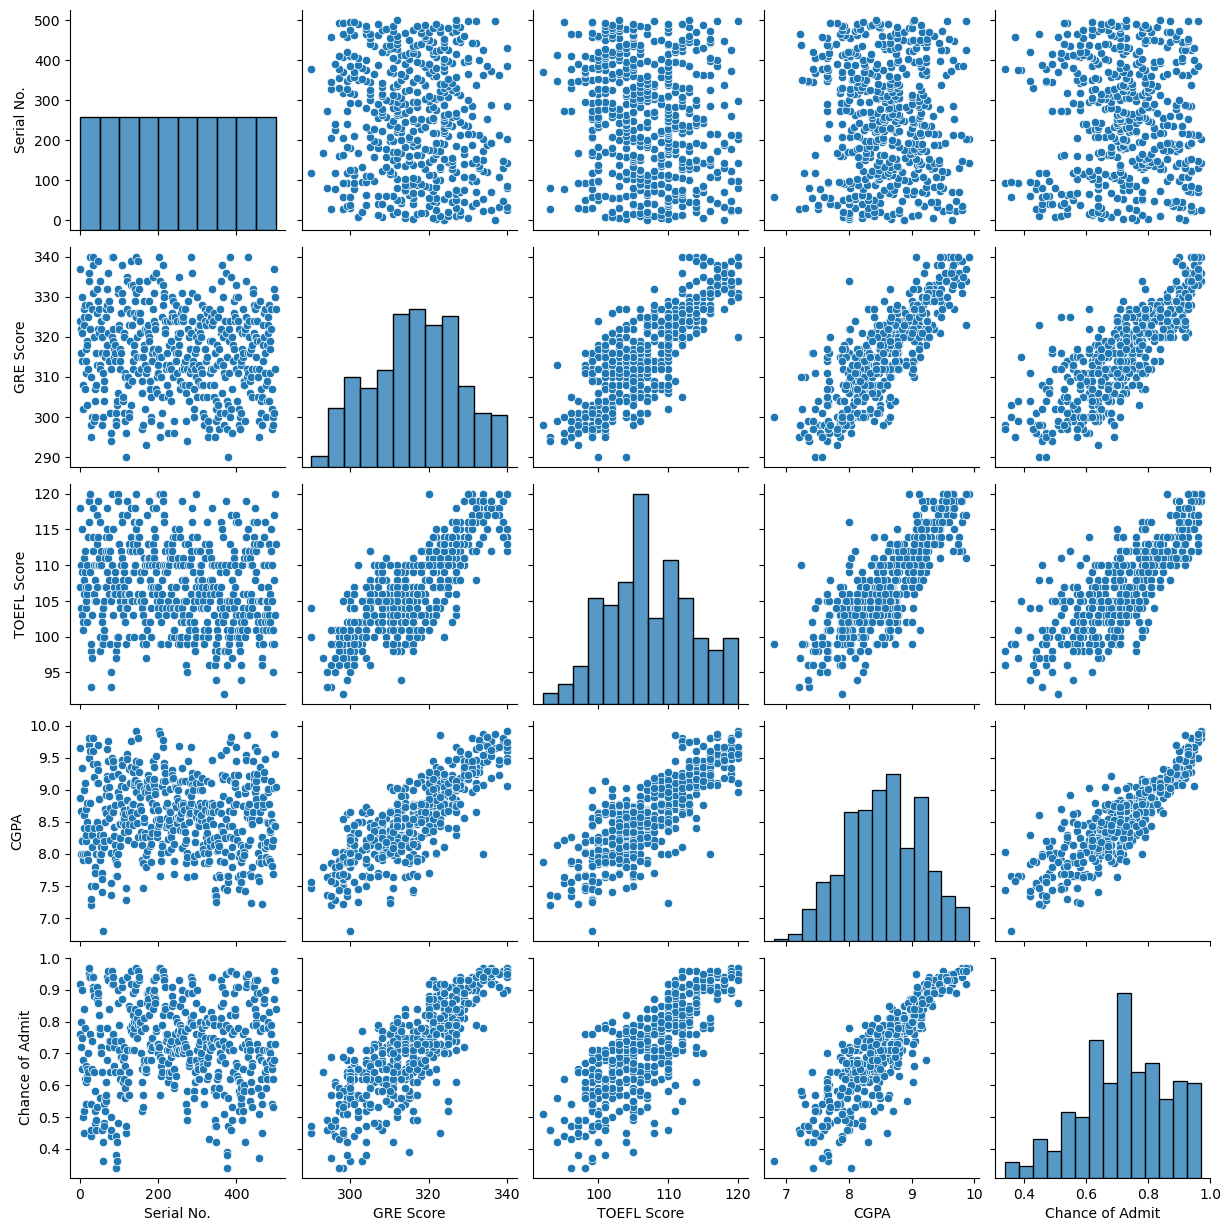

In [14]:
sns.pairplot(df,vars=continous)
plt.show()

In [15]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# DATA PREPROCESSING

DATA CLEANING

In [16]:
#wrong format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [17]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [18]:
df.drop(columns='Serial No.',inplace=True)

In [19]:
#duplicate values
df.duplicated().sum()

0

In [20]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
#missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
df.Research.unique()

array([1, 0], dtype=int64)

In [23]:
#wrong data
df.CGPA.unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [24]:
continous

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

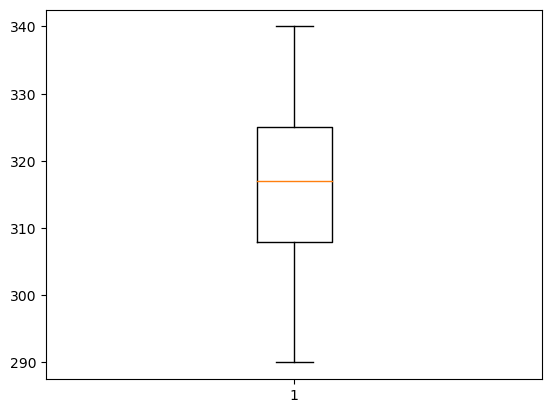

In [25]:
#outliers
plt.boxplot(df['GRE Score'])
plt.show()

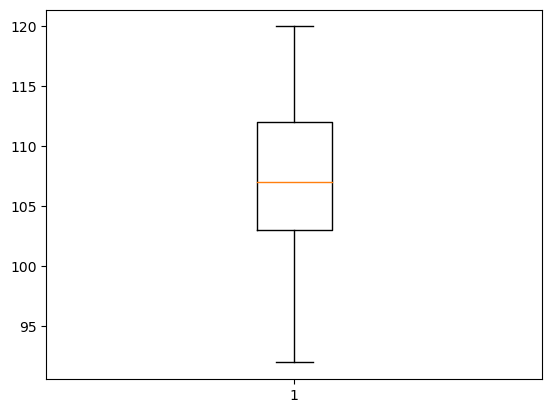

In [26]:
plt.boxplot(df['TOEFL Score'])
plt.show()

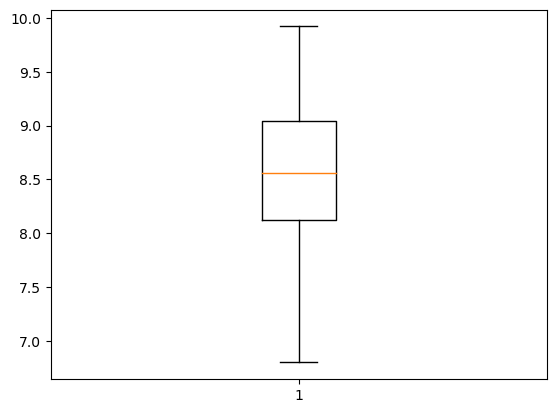

In [27]:
plt.boxplot(df['CGPA'])
plt.show()

DATA TRANFORMATION

In [28]:
#feature transformation
df['GRE Score'].skew(),df['TOEFL Score'].skew(),df['CGPA'].skew()

(-0.03984185809159066, 0.09560097235726285, -0.026612517318359303)

In [29]:
#no feature encoding required

In [30]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# MULTIPLE LINEAR REGRESSION

In [31]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=26)

MODELLING

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
lr.coef_
# CGPA matters the most

array([0.00189144, 0.00287757, 0.00055568, 0.00018632, 0.01580276,
       0.12487645, 0.02679862])

In [35]:
lr.intercept_

-1.3286899602093458

PREDICTION

In [36]:
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

EVALUATION

In [37]:
R2_train = lr.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = lr.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
print('cross_val_linear:',cross_val_score(lr,X,y,cv=5).mean())

R2_train: 0.8223503553249222
R2_test: 0.8091111102701891
cross_val_linear: 0.8108015220863887


# best random state number

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
train=[]
test=[]
cv=[]

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    ypred_train = lr.predict(X_train)
    ypred_test = lr.predict(X_test)
    train.append(lr.score(X_train,y_train))
    test.append(lr.score(X_test,y_test))
    cv.append(cross_val_score(lr,X,y,cv=5).mean())
    
ff = pd.DataFrame({'train':train,'test':test,'cv':cv})
hm = ff[(abs(ff['train']-ff['test'])<=0.05)&(abs(ff['cv']-ff['test'])<=0.05)]
hm[hm['test']==hm['test'].max()].index.to_list()[0]

48

FINAL MODEL

In [39]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

print('coef:',lr.coef_)
print('intercept:',lr.intercept_)

ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

R2_train = lr.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = lr.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
print('cross_val_linear:',cross_val_score(lr,X,y,cv=5).mean())

coef: [0.00190051 0.00305422 0.00732578 0.00140639 0.01680773 0.10988113
 0.02407498]
intercept: -1.249872806540501
R2_train: 0.8112572404086094
R2_test: 0.8565396001109844
cross_val_linear: 0.8108015220863887


check for assumptions

In [40]:
error = ypred_test - y_test

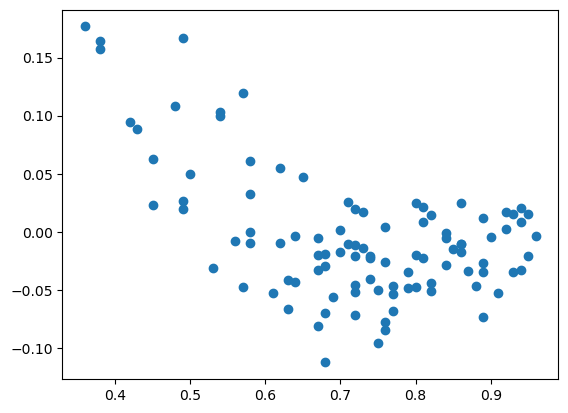

In [41]:
#linearity error
plt.scatter(y_test,error)
plt.show()

In [42]:
#normality error
error.skew()

1.232482395349213

In [43]:
#independent error
import statsmodels.formula.api as smf
f = smf.ols('y~X',data=df).fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        17:06:09   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2757      0.104    -12.232      0.000      -1.481      -1.071
X[0]           0.0019      0.001      3.700      0.000       0.001       0.003
X[1]           0.0028      0.001      3.184      0.002       0.001       0.004
X[2]           0.0059      0.004      1.563      0.119      -0.002       0.013
X[3]           0.0016      0.005      0.348      0.728      -0.007       0.011
X[4]           0.0169      0.004      4.074      0.000       0.009       0.025
X[5]           0.1184      0.010     12.198      0.000       0.099       0.137
X[6]           0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

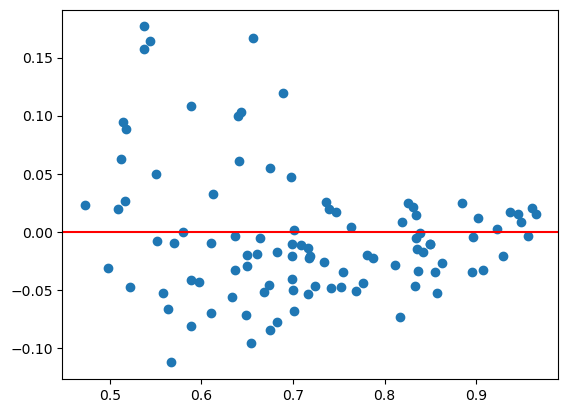

In [44]:
#equal variance of error
plt.scatter(ypred_test,error)
plt.axhline(y=0,color='red')
plt.show()

# MULTIPLE NON-LINEAR REGRESSION

In [45]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=2,include_bias=False)
X_poly = pl.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=48)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
lr.coef_

array([ 2.24638344e-02,  3.65615800e-02, -8.83423603e-02, -7.09527284e-02,
        1.32393177e-02,  2.13714179e-01, -1.74487357e-01, -2.06220007e-07,
       -5.64986333e-05,  5.67113635e-04, -5.66187241e-04,  1.18977869e-03,
       -2.23526584e-03,  5.61641733e-04, -9.75709024e-05,  3.09505812e-04,
        3.34846677e-03, -1.47451512e-03, -9.43873047e-05, -9.60587913e-04,
       -9.40276453e-04,  2.32959181e-02, -1.85142404e-03, -2.14819985e-02,
        2.55412539e-03, -1.37771388e-02,  1.54055702e-03, -1.04608913e-02,
       -1.05225119e-03,  5.18061096e-03, -2.94042353e-02,  1.65283067e-03,
        4.64751580e-02,  3.42345169e-02, -1.74487357e-01])

In [50]:
lr.intercept_

-6.313290822443792

PREDICTION

In [51]:
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

EVALUATION

In [52]:
R2_train = lr.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = lr.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
print('cross_val_nonlinear:',cross_val_score(lr,X_poly,y,cv=5).mean())

R2_train: 0.8279514082804715
R2_test: 0.8555431126499031
cross_val_nonlinear: 0.7818863884540697


HYPER PARAMETER TUNING

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
R2_train=[]
R2_test=[]
cross_val=[]

for i in range(1,10):
    pl = PolynomialFeatures(degree=i,include_bias=False)
    X_poly = pl.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=48)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    ypred_train = lr.predict(X_train)
    ypred_test = lr.predict(X_test)
    R2_train.append(lr.score(X_train,y_train))
    R2_test.append(lr.score(X_test,y_test))
    cross_val.append(cross_val_score(lr,X_poly,y,cv=5).mean())
h = pd.DataFrame({'R2_train':R2_train,'R2_test':R2_test,'cross_val':cross_val})
h

,R2_train,R2_test,cross_val
0,0.811257,0.856540,0.810802
1,0.827951,0.855543,0.781886
2,0.862365,0.720972,0.539369
3,0.953641,-71.258700,-34.972559
4,0.998040,-880.449577,-1785.223889
5,0.995901,-327.692698,-2107.144093
6,0.997748,-294.683439,-2183.307050
7,0.997583,-283.317933,-2382.893388
8,0.998009,-280.202497,-2358.627401


degree 1 is best

# LASSO REGRESSION

In [54]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [56]:
from sklearn.linear_model import Lasso

In [57]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train,y_train)

Lasso()

In [58]:
lr.coef_

array([0.00202784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [59]:
lr.intercept_

0.07997068072154179

In [60]:
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

In [61]:
R2_train = lr.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = lr.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr,X,y,cv=5).mean()
print('cross_val_lasso:',cross_val)

R2_train: 0.23681046237030035
R2_test: 0.2359604894051025
cross_val_lasso: 0.21508757519357102


x=0
l=[]
while x<1000:
    l.append(x)
    x+=0.1

In [62]:
from sklearn.model_selection import GridSearchCV
estimator = Lasso()
param = {'alpha':[0.00001,0.0001,0.05,0.1,0.2,1,2,3,5,10,50,100,1000]}
model = GridSearchCV(estimator,param,scoring='neg_mean_squared_error')
model.fit(X_train,y_train)
model.best_params_

{'alpha': 0.0001}

USING BEST PARAMETER

In [63]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.0001)
lr.fit(X_train,y_train)

print('coef:',lr.coef_)
print('intercept:',lr.intercept_)

ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

R2_train = lr.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = lr.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr,X,y,cv=5).mean()
print('cross_val_lasso:',cross_val)

coef: [0.00194025 0.00307973 0.00732435 0.00141459 0.01683306 0.10895207
 0.02356822]
intercept: -1.2570427559985307
R2_train: 0.8112503044183719
R2_test: 0.8562119257674052
cross_val_lasso: 0.8109036152215928


In [64]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# RIDGE REGRESSION

In [65]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [67]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)

Ridge()

In [68]:
rd.coef_

array([0.00197795, 0.00314377, 0.0074827 , 0.00174928, 0.01709919,
       0.10641039, 0.02382244])

In [69]:
rd.intercept_

-1.2567007910611856

In [70]:
ypred_train = rd.predict(X_train)
ypred_test = rd.predict(X_test)

In [71]:
R2_train = rd.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = rd.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rd,X,y,cv=5).mean()
print('cross_val_ridge:',cross_val)

R2_train: 0.8112095046606773
R2_test: 0.8554772076254247
cross_val_ridge: 0.8104316768033138


HYPERPARAMETER TUNING

In [72]:
from sklearn.model_selection import GridSearchCV
estimator = Ridge()
param = {'alpha':[0.1,0.2,1,2,5,10,50,100,1000]}
model = GridSearchCV(estimator,param,scoring='neg_mean_squared_error')
model.fit(X_train,y_train)
model.best_params_

{'alpha': 1}

REBUILT USING BEST PARAMETER

In [73]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

from sklearn.linear_model import Ridge
rd = Ridge(alpha=1)
rd.fit(X_train,y_train)

print('coef:',rd.coef_)
print('intercept:',rd.intercept_)

ypred_train = rd.predict(X_train)
ypred_test = rd.predict(X_test)

R2_train = rd.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = rd.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rd,X,y,cv=5).mean()
print('cross_val_ridge:',cross_val)

coef: [0.00197795 0.00314377 0.0074827  0.00174928 0.01709919 0.10641039
 0.02382244]
intercept: -1.2567007910611856
R2_train: 0.8112095046606773
R2_test: 0.8554772076254247
cross_val_ridge: 0.8104316768033138


# ELASTIC-NET REGRESSION

In [74]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [76]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(X_train,y_train)

ElasticNet()

In [77]:
#
#yaha drop karege ya best alpha nikalke drop karege?
el.coef_

array([0.00603394, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [78]:
el.intercept_

-1.1890813834834923

In [79]:
ypred_train = el.predict(X_train)
ypred_test = el.predict(X_test)

In [80]:
R2_train = el.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = el.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(el,X,y,cv=5).mean()
print('cross_val_elastic:',cross_val)

R2_train: 0.5491074419827734
R2_test: 0.5500590167573385
cross_val_elastic: 0.5324389764785069


HYPERPARAMETER TUNING

In [81]:
from sklearn.model_selection import GridSearchCV
estimator = ElasticNet()
param = {'alpha':[0.0001,0.1,0.2,1,2,5,10,50,100,1000],'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = GridSearchCV(estimator,param,scoring='neg_mean_squared_error')
model.fit(X_train,y_train)
model.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.9}

USING BEST PARAMETER

In [82]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

from sklearn.linear_model import ElasticNet
el = ElasticNet(alpha=0.0001,l1_ratio=0.9)
el.fit(X_train,y_train)

print('coef:',el.coef_)
print('intercept:',el.intercept_)

ypred_train = el.predict(X_train)
ypred_test = el.predict(X_test)

R2_train = el.score(X_train,y_train)
print('R2_train:',R2_train)
R2_test = el.score(X_test,y_test)
print('R2_test:',R2_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(el,X,y,cv=5).mean()
print('cross_val_elastic:',cross_val)

coef: [0.00193661 0.00307758 0.00732519 0.00141531 0.01683194 0.10902987
 0.02361773]
intercept: -1.2563561690820277
R2_train: 0.8112515106231798
R2_test: 0.8562408011791522
cross_val_elastic: 0.8108924314255569


# Lasso Regression is best one

SAVING THE MODEL

In [83]:
from pickle import dump
dump(lr,open('lr.pkl','wb'))